# Programmation dynamique

## Exercice 

Soit une grille de n lignes et p colonnes.

Par exemple ci-dessous, une grille 3 x 5 : n=3 et p=5

On se déplace en suivant les traits de la grille du point situé en haut à gauche au point situé en bas à droite.

Combien de chemins sont possibles si on se déplace :
- soit horizontalement vers la droite
- soit verticalement vers le bas
Dans cet exemple, il y a 56 chemins possibles.

Comment déterminer le nombre de tous ces chemins ?

In [1]:
def nombre_chemins(n,p):
    """
        Soit une grille de n lignes et p colonnes.
        Par exemple ci-dessous, une grille 3 x 5 : n=3 et p=5
         __ __ __ __ __
        |__|__|__|__|__|
        |__|__|__|__|__|
        |__|__|__|__|__|
        
        On peut déterminer le nombre de chemins pour tout point repéré (i,j)
        On se déplace en suivant les traits de la grille du point situé en haut à gauche 
        au point situé en bas à droite.
        Combien de chemins sont possibles si on se déplace :
        - soit horizontalement vers la droite
        - soit verticalemnt vers le bas
        Dans cet exemple, il y a 56 chemins possibles de puis le point en haut à gauche (0,0).
        
        Comment déterminer le nombre de tous ces chemins ?
        
    """
    # Grille de n+1 lignes et p+1 colonnes remplies de 1
    # Attention : [[1]*(p+1)]*(n+1) crée des copies de listes -> ne marche pas ! 
    # Les listes sont modifiées en même temps.
    
    grille = [[1 for j in range(p+1)] for i in range(n+1)]
    for i in range(1,n+1):
        for j in range(1,p+1):
            grille[n-i][p-j]=grille[n-i+1][p-j]+grille[n-i][p-j+1]
    return grille


chemins=nombre_chemins(100,100)
print(chemins[0][0])

90548514656103281165404177077484163874504589675413336841320


### Algorithme récursif

Lorsque la position du point se situe en bas ou à droite, il n'y a dans ces cas qu'un seul chemin pour accéder au point d'arrivée.

Le premier appel se fait au point (n,p). 
Le nombre de chemins depuis ce point de départ est égal au nombre de chemins pour le point juste à droite auquel on ajoute le nombre de chamins pour le point juste en dessous.

In [ ]:
def nombre_chemins_recursif(n,p):
    if n==0 or p==0:
        return 1
    else:
        return nombre_chemins_recursif(n-1,p) + nombre_chemins_recursif(n,p-1)
    
nombre_chemins_recursif(15,15)

### Programmation dynamique

Le nombre de chemins d'un point de la grille jusqu'au point d'arrivée est la somme des nombres de chemins du point situé à droite et du point situé en dessous. On peut donc aborder le problème de 2 façons différentes.

- en partant du départ (haut, gauche) avec des indices i et j qui progressent jusqu'à arriver à n et p;
- en partant du point d'arrivée (bas, droite) et en remontant les indices n, p jusqu'à 0,0.

On donne un exemple de la décomposition des chemins sur une grille `n=2` et `p=3`.

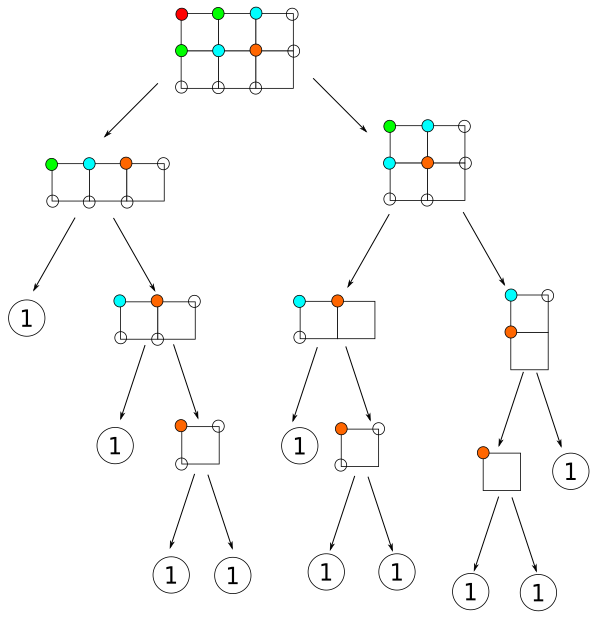

In [30]:
def nb_chemins_mem(n,p):
    mem = [[0 for j in range(p+1)] for i in range(n+1)]
    return nb_chemins_rec(0,0,n,p,mem)

def nb_chemins_rec(i,j,n,p,mem):
    if i==n or j==p:
        mem[i][j]=1
        return mem[i][j]
    if mem[i][j]>0:
        print('mem:',mem)
        return mem[i][j]
    else:
        mem[i][j]=nb_chemins_rec(i+1,j,n,p,mem)+nb_chemins_rec(i,j+1,n,p,mem)
        print('rec:',mem)
        return mem[i][j]
    
nb_chemins_mem(2,3)

rec: [[0, 0, 0, 0], [0, 0, 2, 1], [1, 1, 1, 0]]
rec: [[0, 0, 0, 0], [0, 3, 2, 1], [1, 1, 1, 0]]
rec: [[0, 0, 0, 0], [4, 3, 2, 1], [1, 1, 1, 0]]
mem: [[0, 0, 0, 0], [4, 3, 2, 1], [1, 1, 1, 0]]
mem: [[0, 0, 0, 0], [4, 3, 2, 1], [1, 1, 1, 0]]
rec: [[0, 0, 3, 1], [4, 3, 2, 1], [1, 1, 1, 0]]
rec: [[0, 6, 3, 1], [4, 3, 2, 1], [1, 1, 1, 0]]
rec: [[10, 6, 3, 1], [4, 3, 2, 1], [1, 1, 1, 0]]


In [16]:
def nb_chemins_mem(n,p):
    mem = [[0 for j in range(p+1)] for i in range(n+1)]
    return nb_chemins_rec(n,p,mem)

def nb_chemins_rec(n,p,mem):
    if n==0 or p==0:
        mem[n][p]=1
        return mem[n][p]
    if mem[n][p]>0:
        return mem[n][p]
    else:
        mem[n][p]=nb_chemins_rec(n-1,p,mem)+nb_chemins_rec(n,p-1,mem)
        return mem[n][p]
    
nb_chemins_mem(15,15)

155117520

### Remarque

On peut également créer un tableau mémoire carré et stocker les valeurs symétriques pour réduire encore le nombre d'appels récursifs.

A vérifier !

In [ ]:
def nb_chemins_mem(n,p):
    if n < p:
        mem = [[0 for j in range(p+1)] for i in range(p+1)]
    else:
        mem = [[0 for j in range(n+1)] for i in range(n+1)]
    return nb_chemins_rec_2(n,p,mem)

def nb_chemins_rec_2(n,p,mem):
    if n==0 or p==0:
        mem[n][p]=1
        return mem[n][p]
    if mem[n][p]>0 or mem[p][n]:
        return mem[n][p]
    else:
        mem[n][p]=nb_chemins_rec_2(n-1,p,mem)+nb_chemins_rec_2(n,p-1,mem)
        mem[p][n]=mem[n][p]
        return mem[n][p]
    
nb_chemins_mem(6,5)

## Conclusion

1. On remarque qu'il est possible de trouver le nombre de chemins en itératif et en programmation dynamique avec des valeurs élevées dans un temps court.

2. Pour la fonction récursive, les appels deviennent très nombreux et prennent beaucoup de temps en calcul. Dès que n>15 et p>15, la fonction récursive ne parvient pas à renvoyer un résultat dans un délai raisonnable.